<a href="https://colab.research.google.com/github/ChrisStavropoulos/AI-in-Cybersecurity/blob/main/ransomware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#εισαγωγή βιβλιοθηκών - πακέτων
!pip install ppscore
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.covariance import EllipticEnvelope
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import ppscore as pps
import seaborn as sns
import matplotlib.pyplot as plt


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 21.8 MB/s eta 0:00:00
  Created wheel for ppscore: filename=ppscore-1.3.0-py2.py3-none-any.whl size=13164 sha256=574f30a306b06ca3694b1d736b533f4d6b0ab2ab47c5912c8421ee7b7402a567
  Stored in directory: /root/.cache/pip/wheels/42/87/10/00056aa2d2624f1b9374db6a0d5245da9a3d87bdc9247c1a56
Successfully built ppscore
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.10.1 requires pandas<2.2.3dev0,>=2.0, but you have pandas 1.5.3 which is incompatible.
google-colab 1.0.0 requires pandas==2.2.2, but you have pandas 1.5.3 which is incompatible.
mizani 0.13.1 requires pandas>=2.2.0, but you have pandas 1.5.3 which i

In [ ]:
#εισαγωγή του συνόλου δεδομένων
dataset=pd.read_csv("https://media.githubusercontent.com/media/kdemertzis/EKPA/main/Data/Ransomware.csv",sep='|')

In [ ]:
#eξερεύνηση συνόλου δεδομένων
dataset

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,VirusShare_8e292b418568d6e7b87f2a32aee7074b,8e292b418568d6e7b87f2a32aee7074b,332,224,258,11,0,205824,223744,0,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,VirusShare_260d9e2258aed4c8a3bbd703ec895822,260d9e2258aed4c8a3bbd703ec895822,332,224,33167,2,25,37888,185344,0,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,VirusShare_8d088a51b7d225c9f5d11d239791ec3f,8d088a51b7d225c9f5d11d239791ec3f,332,224,258,10,0,118272,380416,0,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,VirusShare_4286dccf67ca220fe67635388229a9f3,4286dccf67ca220fe67635388229a9f3,332,224,33166,2,25,49152,16896,0,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [ ]:
#περιγραφικά στατιστικά συνόλου δεδομένων
dataset.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


In [ ]:
# Επιλογή μόνο των αριθμητικών τιμών για τον υπολογισμό του PPSCORE, ΕΞΑΙΡΩΝΤΑΣ τη στήλη 'Machine' αν υπάρχει
numerical_features = [col for col in dataset.columns if pd.api.types.is_numeric_dtype(dataset[col]) and col != 'Machine']
data_numerical = dataset[numerical_features]

In [ ]:
data_numerical

,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,224,258,9,0,361984,115712,0,6135,4096,372736,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,224,3330,9,0,130560,19968,0,81778,4096,143360,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,224,3330,9,0,517120,621568,0,350896,4096,811008,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,224,258,9,0,585728,369152,0,451258,4096,798720,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,224,258,9,0,294912,247296,0,217381,4096,536576,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,224,258,11,0,205824,223744,0,123291,4096,212992,...,7,4.122736,1.370260,7.677091,14900.714286,16,81654,72,0,0
138043,224,33167,2,25,37888,185344,0,40000,4096,45056,...,26,3.377663,2.031619,5.050074,6905.846154,44,67624,0,15,0
138044,224,258,10,0,118272,380416,0,59610,4096,122880,...,22,6.825406,2.617026,7.990487,14981.909091,48,22648,72,14,0
138045,224,33166,2,25,49152,16896,0,51216,4096,53248,...,10,3.421627,2.060964,4.739744,601.600000,16,2216,0,0,0


In [ ]:
# ανακάτεμα δεδομένων
dataset = data_numerical.sample(frac=1).reset_index(drop=True)
dataset.head()

,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,224,8462,8,0,835584,131072,0,840558,8192,843776,...,2,3.618427,3.541949,3.694904,62222.000000,1108,123336,0,18,1
1,224,271,6,0,13824,43008,65536,6291,4096,20480,...,0,0.000000,0.000000,0.000000,0.000000,0,0,0,0,0
2,224,258,10,0,119808,375808,0,60996,4096,126976,...,19,6.861631,2.549420,7.991658,17103.315790,48,25431,72,15,0
3,224,258,10,0,28672,445952,16896,14819,4096,32768,...,21,3.420727,1.865234,7.968850,6558.428571,180,67624,0,0,0
4,224,8450,9,0,401408,136192,0,199558,4096,405504,...,2,4.131789,3.467604,4.795974,585.000000,346,824,72,16,1


In [ ]:
#tαξινόμηση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό
#0 legit, 1 ransomware
dataset.groupby(dataset['legitimate']).size()

,0
legitimate,
0,96724
1,41323


([<matplotlib.patches.Wedge at 0x7fbe96fad960>,
 [Text(0.6484073958497663, 0.8885763045497695, 'Malware'),
  Text(-0.6484073958497659, -0.8885763045497698, 'Legitimate')],
 [Text(0.35367676137259974, 0.4846779842998742, '30%'),
  Text(-0.35367676137259957, -0.48467798429987435, '70%')])

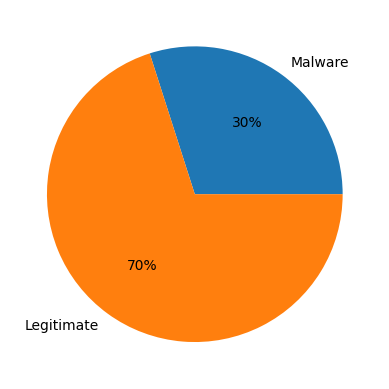

In [ ]:
#γραφική απεικόνιση δεδομένων με βάση το εάν είναι νόμιμο ή κακόβουλο λογισμικό#
#0 legit, 1 ransomware
type_classify=['Malware', 'Legitimate']
count_classify=[41323,96724]
plt.pie(count_classify, labels=type_classify, autopct='%0.f%%')

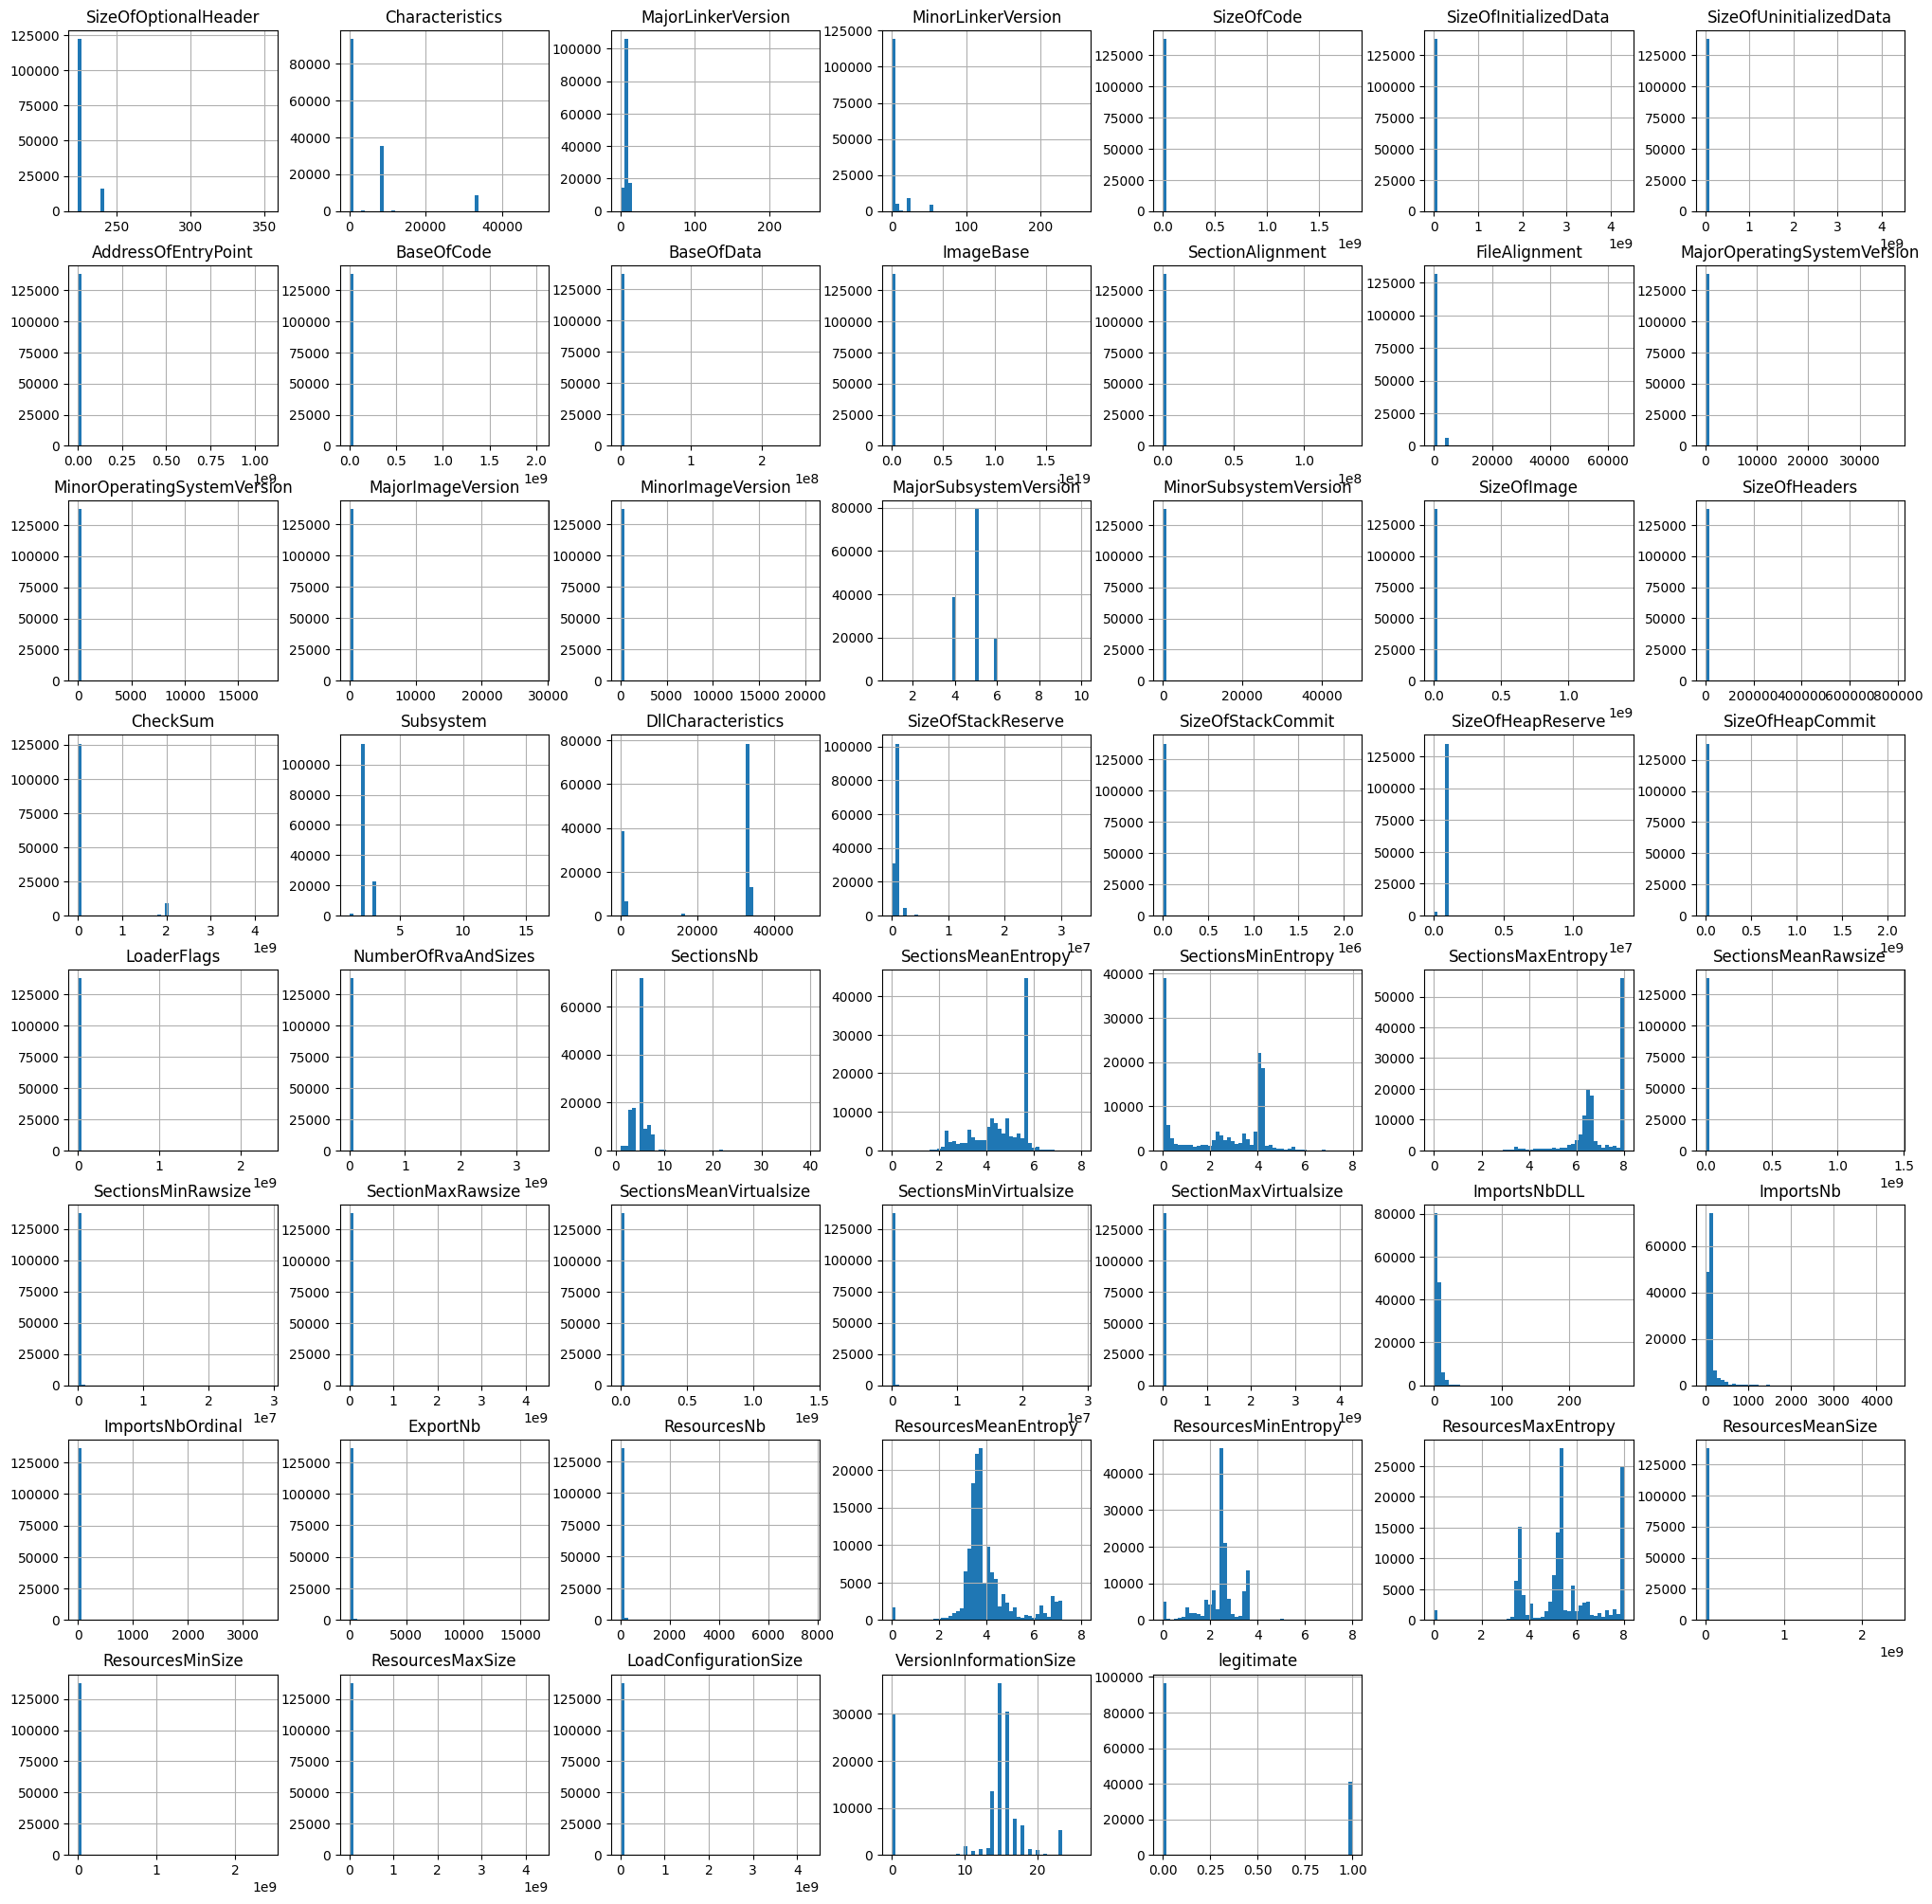

In [ ]:
#οπτικοποίηση της κατανομής των δεδομένων
dataset.hist(bins = 50,figsize = (25,25))
plt.show()

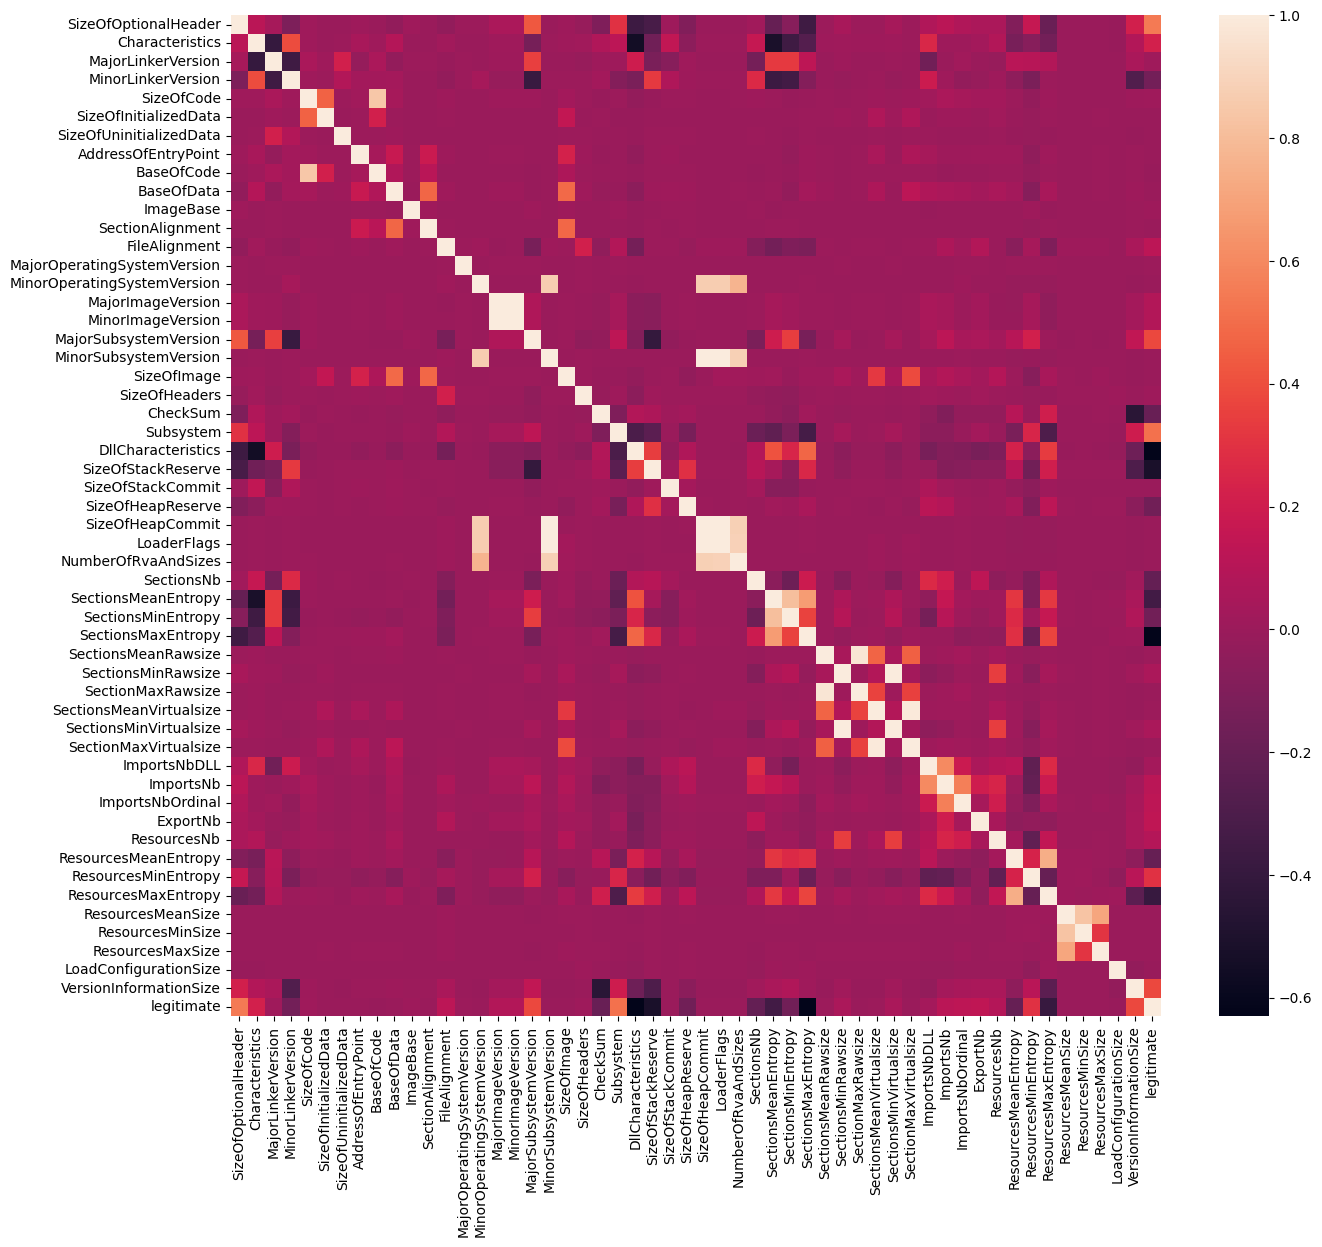

In [ ]:
#πίνακας συσχέτισης χαρακτηριστικών του συνόλου δεδομένων
plt.figure(figsize=(15,13))
sns.heatmap(dataset.corr())
plt.show()

In [ ]:
#έλεγχος κενών τιμών στα δεδομένα
dataset.isnull().sum()

,0
SizeOfOptionalHeader,0
Characteristics,0
MajorLinkerVersion,0
MinorLinkerVersion,0
SizeOfCode,0
SizeOfInitializedData,0
SizeOfUninitializedData,0
AddressOfEntryPoint,0
BaseOfCode,0
BaseOfData,0


In [ ]:
# Ορισμός X και y
X = dataset.drop('legitimate', axis=1)
y = dataset['legitimate']

In [ ]:
# Χειρισμός τιμών που λείπουν με στρατηγική "συμπλήρωση με σταθερή τιμή"
imputer = SimpleImputer(strategy='constant', fill_value=0)  # Changed fill_value to 0
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_imputed

,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,...,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize
0,224.0,8462.0,8.0,0.0,835584.0,131072.0,0.0,840558.0,8192.0,843776.0,...,0.0,2.0,3.618427,3.541949,3.694904,62222.000000,1108.0,123336.0,0.0,18.0
1,224.0,271.0,6.0,0.0,13824.0,43008.0,65536.0,6291.0,4096.0,20480.0,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,224.0,258.0,10.0,0.0,119808.0,375808.0,0.0,60996.0,4096.0,126976.0,...,0.0,19.0,6.861631,2.549420,7.991658,17103.315790,48.0,25431.0,72.0,15.0
3,224.0,258.0,10.0,0.0,28672.0,445952.0,16896.0,14819.0,4096.0,32768.0,...,0.0,21.0,3.420727,1.865234,7.968850,6558.428571,180.0,67624.0,0.0,0.0
4,224.0,8450.0,9.0,0.0,401408.0,136192.0,0.0,199558.0,4096.0,405504.0,...,164.0,2.0,4.131789,3.467604,4.795974,585.000000,346.0,824.0,72.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138042,240.0,35.0,8.0,0.0,30720.0,5120.0,0.0,26128.0,4096.0,0.0,...,0.0,4.0,3.463395,2.426218,5.007155,467.250000,108.0,956.0,0.0,17.0
138043,224.0,8450.0,9.0,0.0,10240.0,3584.0,0.0,10868.0,4096.0,16384.0,...,3.0,2.0,3.106151,2.632525,3.579777,564.000000,208.0,920.0,72.0,16.0
138044,224.0,258.0,10.0,0.0,118784.0,384000.0,0.0,59930.0,4096.0,122880.0,...,0.0,22.0,6.835151,2.458492,7.990487,15158.500000,48.0,22648.0,72.0,14.0
138045,240.0,8226.0,9.0,0.0,972800.0,71680.0,0.0,922724.0,4096.0,0.0,...,1.0,1.0,3.563680,3.563680,3.563680,904.000000,904.0,904.0,0.0,16.0


In [ ]:
# Δημιουργία του OneClassSVM με προεπιλεγμένες ρυθμίσεις για τον εντοπισμό ακραίων τιμών
outlier_detector = OneClassSVM(nu=0.05)
outliers = outlier_detector.fit_predict(X_imputed)

In [ ]:
# Εκτύπωση των ακραίων τιμών
print("Ακραίες Τιμές:\n", outliers)

Ακραίες Τιμές:
 [-1 -1 -1 ... -1 -1 -1]


In [ ]:
# Δημιουργία νέου συνόλου δεδομένων μετά την αφαίρεση των ακραίων τιμών
clean_data = pd.DataFrame(X_imputed[outliers != -1])
clean_data['legitimate'] = y[outliers != -1]

In [29]:
# Υπολογισμός του πίνακα PPS
pps_matrix = pps.matrix(clean_data)

In [30]:
# Πάρε τα πραγματικά ονόματα των στηλών από το pps_matrix (π.χ., 'x') που αντιστοιχούν στις αριθμητικές μεταβλητές
pps_matrix_columns = pps_matrix['x'].unique() # Υπέθεσε ότι η στήλη 'x' περιέχει τα ονόματα των χαρακτηριστικών

In [31]:
# Τώρα φιλτράρισε χρησιμοποιώντας αυτά τα πραγματικά ονόματα στηλών
pps_matrix_filtered = pps_matrix[pps_matrix['x'].isin(numerical_features) & pps_matrix['y'].isin(numerical_features)]

In [32]:
# Εξαγάγετε τα σχετικά δεδομένα για τον θερμικό χάρτη
heatmap_data = pps_matrix_filtered.pivot(index='x', columns='y', values='ppscore')

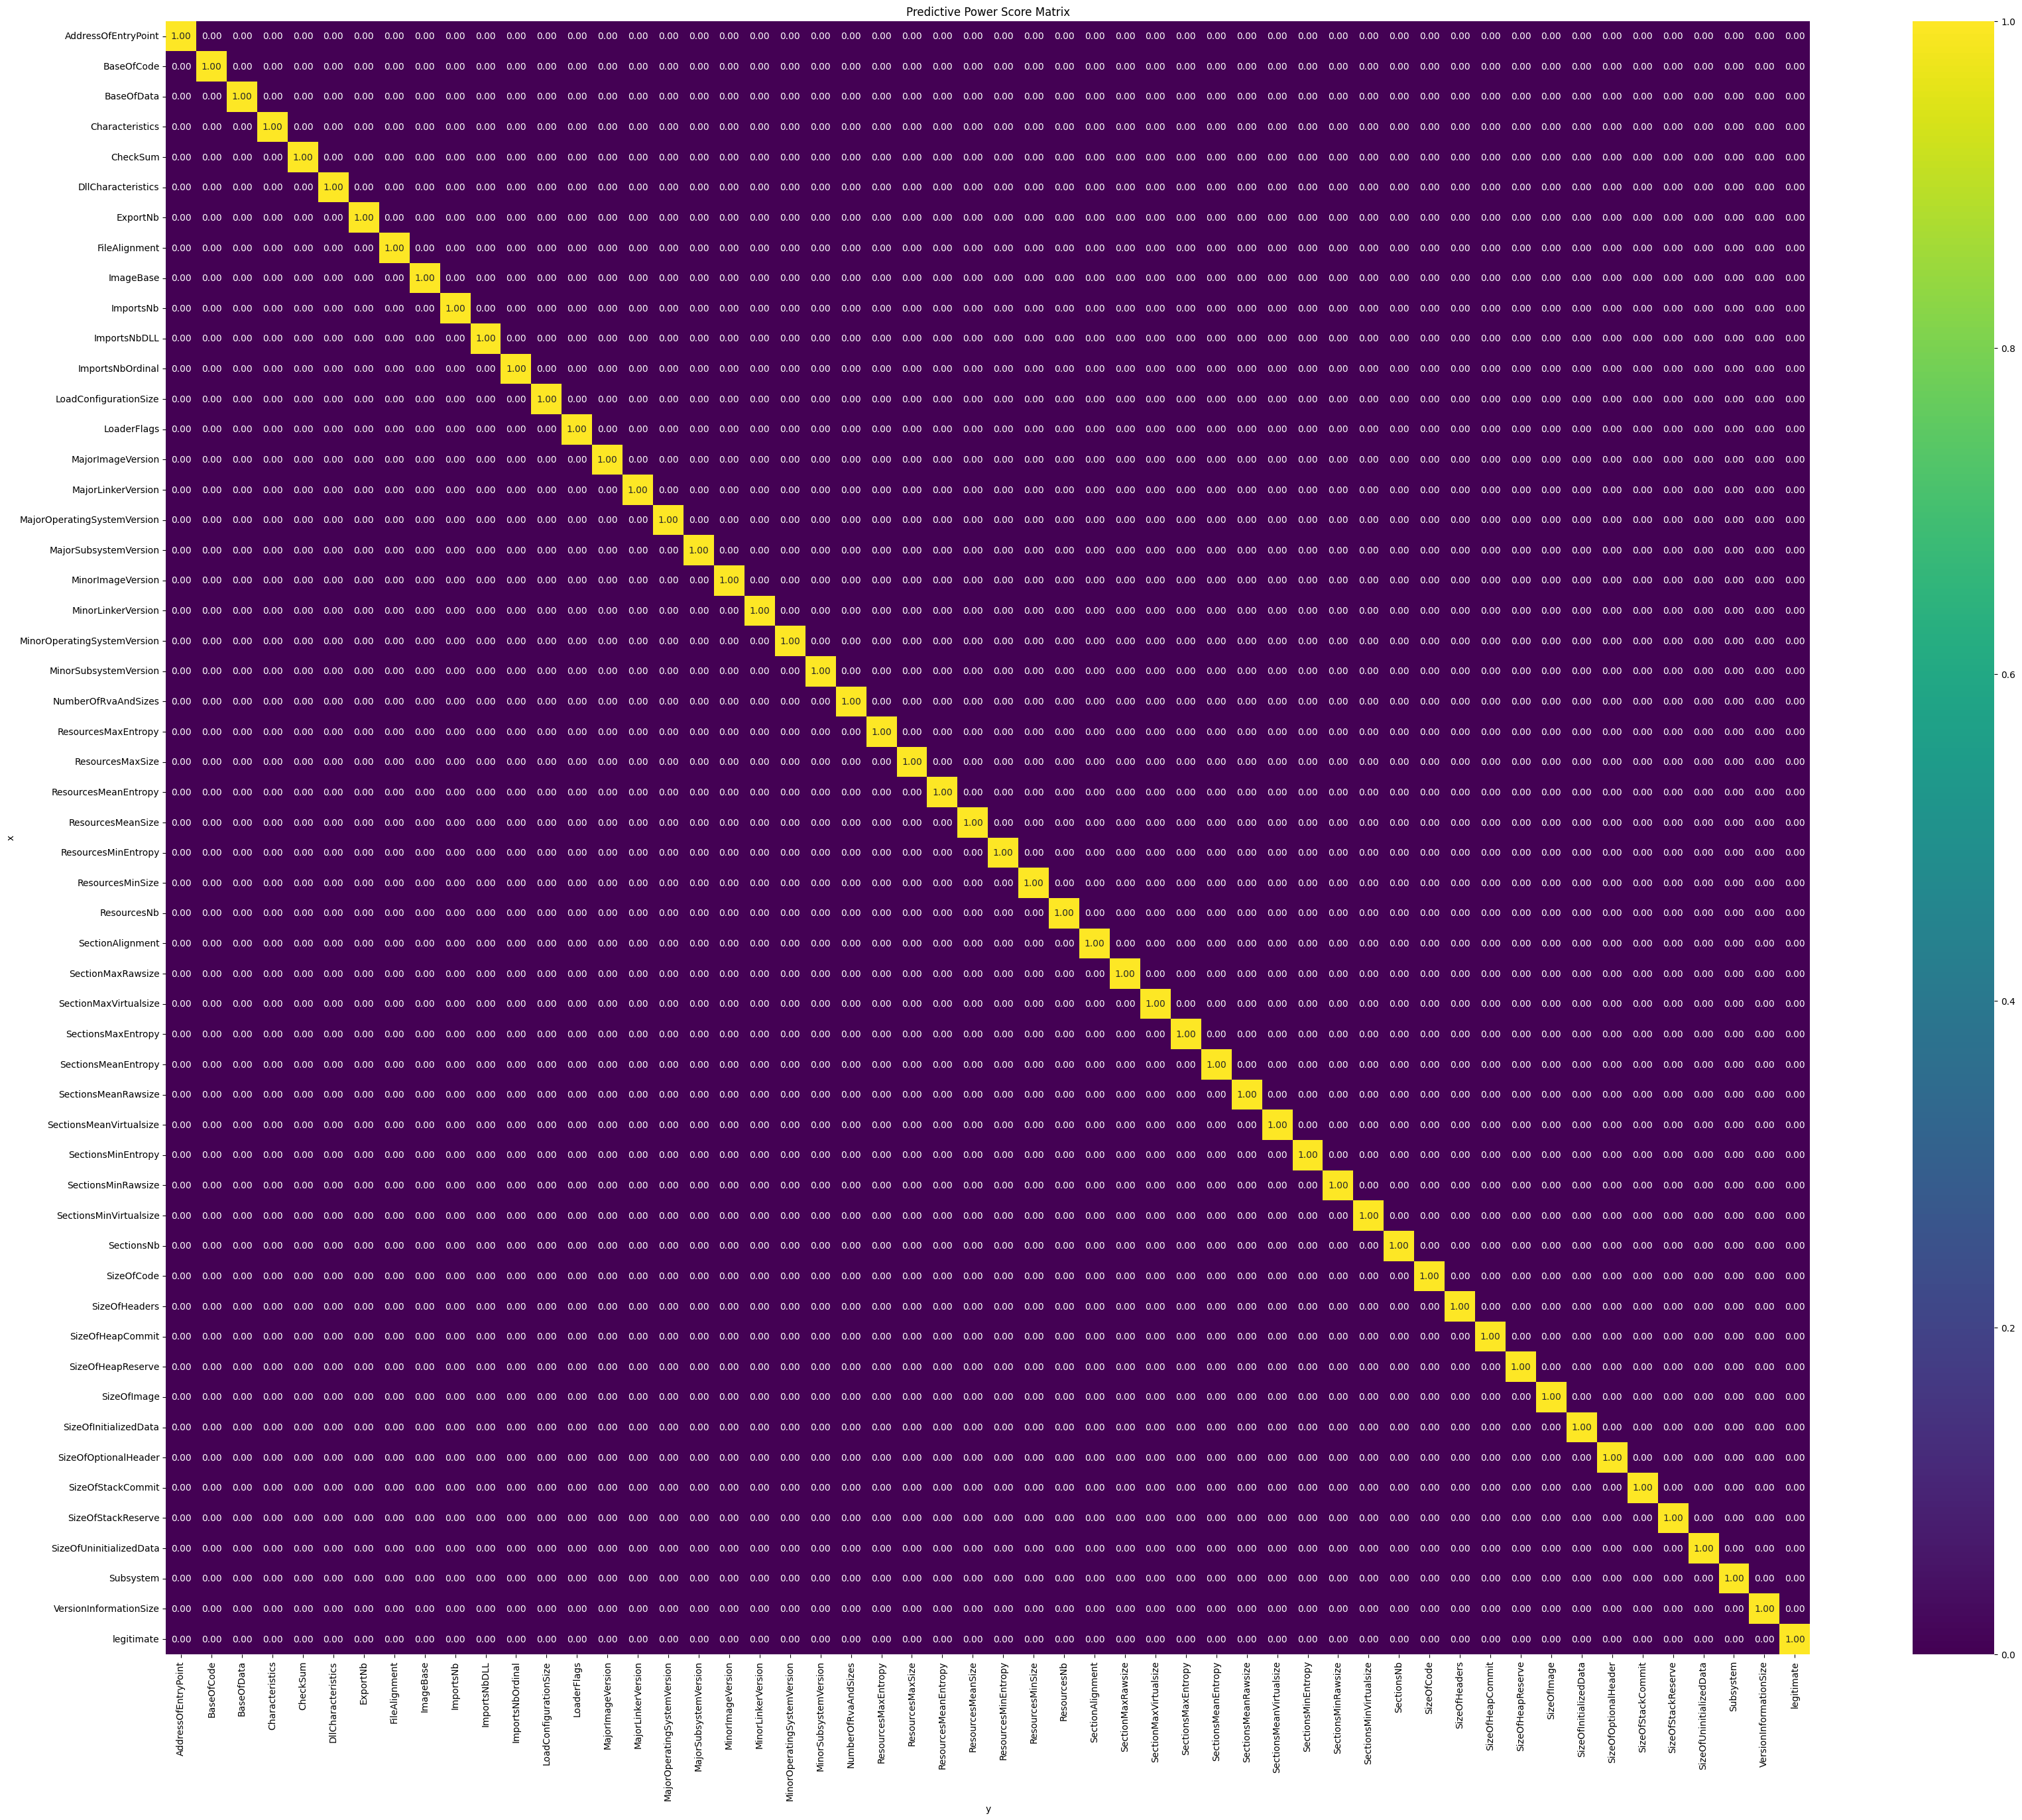

In [34]:
# Σχεδίασε τον θερμικό χάρτη
plt.figure(figsize=(40, 32))
sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt=".2f")
plt.title('Predictive Power Score Matrix')
plt.show()